In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
import scipy.stats as stats
import math

In [4]:
# Function to plot prior distribution for Hibbard et al's. Bayesian model (equation (2)). 

def prior(S_p,sig_s):
    
    # S_p = mean slant, sig_s slant standard deviation  
    
    # define slant in radians
    
    radians_shat = []

    for i in range(-90,90):
        radians_shat.append(i*math.pi/180)
    
    # calculate equation (2)
    
    prior_not_norm = [(i, np.exp(-(i - S_p)**2/(2*sig_s**2))) for i in radians_shat]
    
    # normalize to obtain prior distribution 
    
    prior_test = []

    for e in prior_not_norm:
        prior_test.append(e[1])

    sum_of_prior_values = sum(prior_test)

    norm_prior = []

    for e in prior_not_norm:
        norm_prior.append((e[0],e[1]/sum_of_prior_values))
        
    x = list(zip(*norm_prior))[0]
    y = list(zip(*norm_prior))[1]

    plt.plot(x,y)
    
    plt.xlabel('slant (in radians)')
    plt.ylabel('probability density')
    
    
    

In [10]:
# Function to plot prior distribution for Hibbard et al's. Bayesian model (equation (2)).

def likelihood(S,A,ahat,sig_a,sig_sl):
    
     # S = slant, A = aspect ratio, ahat = estimated aspect ratio, sig_a = standard deviation for aspect ratio, sig_sl = standard deviation for slant
    
     # define range of estimated aspect ratio values from 0 to 2 by increments of .1
    
    l = range(21)

    asp = []

   

    for e in l:
        e = e/10
        asp.append(e)

    # define range of slant values between -1.5 radians to 1.5 radians
        
    radians_shat = []

    for i in range(-90,90):
        radians_shat.append(i*math.pi/180)
        
    # calculate equation (3)
    
    likeli_not_norm = [(i, k, np.exp(-(i-S)**2/(2*sig_sl**2)-(k-A*np.cos(S))**2/(2*sig_a**2))) for k in asp for i in radians_shat]
    
     # normalize to obtain likelihood 
    
    likeli_test = []

    for e in likeli_not_norm:
        likeli_test.append(e[2])

    sum_of_likeli_values = sum(likeli_test)

    norm_likeli = []

    for e in likeli_not_norm:
        norm_likeli.append((e[0],e[1],e[2]/sum_of_likeli_values))
    
    #plot
    
    from math import log

    ax = plt.axes(projection='3d')
    col1 = list(zip(*norm_likeli))[0]
    col2 = list(zip(*norm_likeli))[1]
    col3 = list(zip(*norm_likeli))[2]
    
    #For log probability use:
    #new_col3 = [log(x) for x in col3]
    #ax.plot_trisurf(col1, col2, new_col3,
                    #cmap='viridis', edgecolor='none')
        
    # For prob density use:
    ax.plot_trisurf(col1,col2,col3,
                   cmap= 'viridis', edgecolor='none')
    ax.set_zlabel('probability density', fontsize=12, rotation = 0)
    ax.set_ylabel('aspect ratio', fontsize=12, rotation = 0)
    ax.set_xlabel('slant (in radians)', fontsize=12, rotation= 0)
    

In [6]:
#Function to plot posterior distribution for the Bayesian model in Hibbard et al. 2012. See equations (1), (2) and (3).  

def posterior(S,A,ahat,sig_a,sig_sl,sig_s,S_p):
    
    # S = slant, A = aspect ratio, ahat = estimated aspect ratio, sig_a = standard deviation for aspect ratio, sig_sl = standard deviation for slant (likelihood), sig_s = standard deviation for slant (prior), S_p = mean slant (prior)  
    
    # define range of aspect ratio values from 0 to 2 by increments of .1

    l = range(21)

    asp = []

    
    for e in l:
        e = e/10
        asp.append(e)

    # define range of slant values from -1.5 radians to 1.5 radians 
        
    radians_shat = []

    for i in range(-90,90):
        radians_shat.append(i*math.pi/180)
    
    # calculate posterior proportional to likelihood and prior (multiply equations (2) and (3)) 
    
    post_not_norm = [(i, k, (np.exp(-(i-S)**2/(2*sig_sl**2)-(k-A*np.cos(S))**2/(2*sig_a**2)))*(np.exp(-(i - S_p)**2/(2*sig_s**2)))) for k in asp for i in radians_shat]
    
    # normalize 
    
    post_test = []

    for e in post_not_norm:
        post_test.append(e[2])

    sum_of_posterior_values = sum(post_test)

    norm_posterior = []

    for e in post_not_norm:
        norm_posterior.append((e[0],e[1],e[2]/sum_of_posterior_values))
    
    #plot
    
    from math import log

    ax = plt.axes(projection='3d')
    col1 = list(zip(*norm_posterior))[0]
    col2 = list(zip(*norm_posterior))[1]
    col3 = list(zip(*norm_posterior))[2]
    
    #For log probability use:
    #new_col3 = [log(x) for x in col3]
    #ax.plot_trisurf(col1, col2, new_col3,
                    #cmap='viridis', edgecolor='none')
        
    # For prob density use:
    ax.plot_trisurf(col1,col2,col3,
                   cmap= 'viridis', edgecolor='none')
    ax.set_zlabel('probability density', fontsize=12, rotation = 0)
    ax.set_ylabel('aspect ratio', fontsize=12, rotation = 0)
    ax.set_xlabel('slant (in radians)', fontsize=12, rotation= 0)
    
    

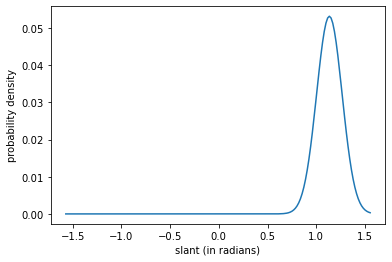

In [14]:
# prior demo using Hibbard et al.'s parameters

prior(65*math.pi/180,7.5*math.pi/180)



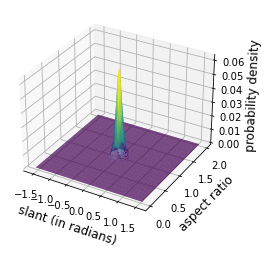

In [11]:
# likelihood demo using Hibbard et al.'s parameters 

likelihood(0,1,1,.05,5*math.pi/180)

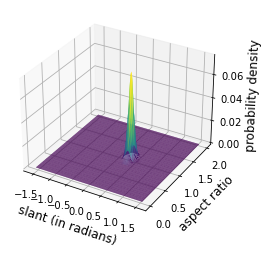

In [13]:
# posterior demo using Hibbard et al.'s parameters 

posterior(0,1,1,.05,5*math.pi/180,7.5*math.pi/180,65*math.pi/180)